# **Module 2: Vector Data in Python**

#### Data
In this example, we will use the following datasets (exported from `spData` R package):  
- `world.shp` - national boundaries at a global level;
- `coffee_data.csv` - coffee production statistics by country, 2016 and 2017.
- `points.shp` - random points;
- `nz.shp` - the regions of New Zealand;
- `nz_height.shp` - high elevation points in New Zealand;
- `seine.shp` - river network in France.

Additionally, one dataset was derived ‍the HydroSHEDS database https://www.hydrosheds.org/:
- `lakes.shp` - selected lakes in Eastern Africa.

#### Software
To execute this code you will need a Python environment with the packages imported below (all required packages are already available on GEMS Informatics Platform).

In [ ]:
# general use packages
import pandas as pd
import random
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True

# geospatial packages
import geopandas as gpd

import os
os.environ['PROJ_LIB'] = '/opt/conda/envs/user_default/share/proj'

### **Vector Data Review**

Representation of the spatial features using points, lines, and polygons

- Point: a precise location in space (e.g., weather stations)
- Line: a sequential collection of connected points (e.g., roads)
- Polygon: a region enclosed by lines (e.g., countries)

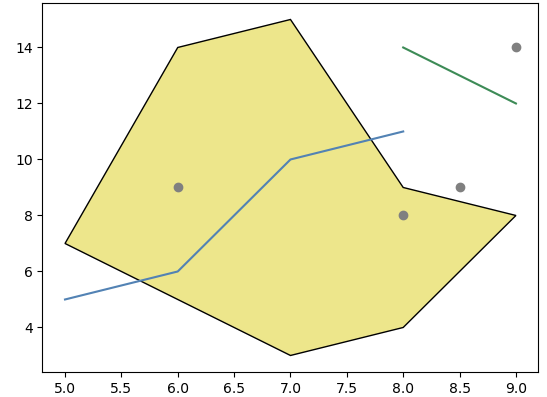

### **Attribute operations**

#### Select by attributes

In [ ]:
world = gpd.read_file("./data-module-2/world.shp")
world.head()

In [ ]:
world[world["name_long"] == "Canada"]

In [ ]:
midsized_countries = world[(world["area_km2"] > 1000000)&(world["area_km2"] < 5000000)]
midsized_countries.head()

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(9,9), tight_layout=True)

world.plot(ax=axs[0], column="iso_a2", cmap="Pastel2", edgecolor="grey")
axs[0].set_title("All countries", weight="bold")

world.plot(ax=axs[1], color="whitesmoke", edgecolor="grey")
midsized_countries.plot(ax=axs[1], facecolor="palevioletred", edgecolor="grey")
axs[1].set_title("Mid-sized countries", weight="bold")

#### Group  by attributes

In [ ]:
continents = world[["continent", "geometry", "pop"]].dissolve(by="continent", aggfunc="sum")
continents

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(9,9), tight_layout=True)

world["pop"] = world["pop"].fillna(0)
world.plot(ax=axs[0], column="pop", legend=True, scheme="User_Defined", cmap="YlOrBr", 
           edgecolor="grey", classification_kwds=dict(bins=[33000000,100000000,204000000,319000000]),
           legend_kwds={"labels": ["< 33 mln", "33 - 100 mln", "100 - 204 mln", 
                                   "204 - 319 mln", "> 319 mln"]})
axs[0].set_title("Population by countries", weight="bold")
axs[0].set_facecolor("powderblue")

continents.plot(ax=axs[1], column="pop", cmap="afmhot_r", edgecolor="grey")
continents.plot(ax=axs[1], column="pop", legend=True, scheme="User_Defined", cmap="YlOrBr", 
           edgecolor="grey", classification_kwds=dict(bins=[38000000,413000000,670000000,1155000000]),
           legend_kwds={"labels": ["< 38 mln", "38 - 413 mln", "413 - 670 mln", "670 - 1,155 mln",
                                   "> 1,155 mln"]})
axs[1].set_title("Population by continents", weight="bold")
axs[1].set_facecolor("powderblue")

#### Join by attributes

In [ ]:
coffee_data = pd.read_csv("./data-module-2/coffee_data.csv", index_col=0)
coffee_data.head()

In [ ]:
world_coffee = pd.merge(world, coffee_data, on="name_long")
world_coffee.head()

In [ ]:
fig, ax = plt.subplots(figsize=(9,9), tight_layout=True)


world.plot(ax=ax, color="whitesmoke", edgecolor="grey")
world_coffee.plot(ax=ax, column="coffee_production_2017", cmap="copper_r", edgecolor="grey",
                 scheme="FisherJenks", legend=True)
ax.set_facecolor("powderblue")
ax.set_title("2017 coffee production", weight="bold")

### **Spatial operations**

#### Types of spatial relationships
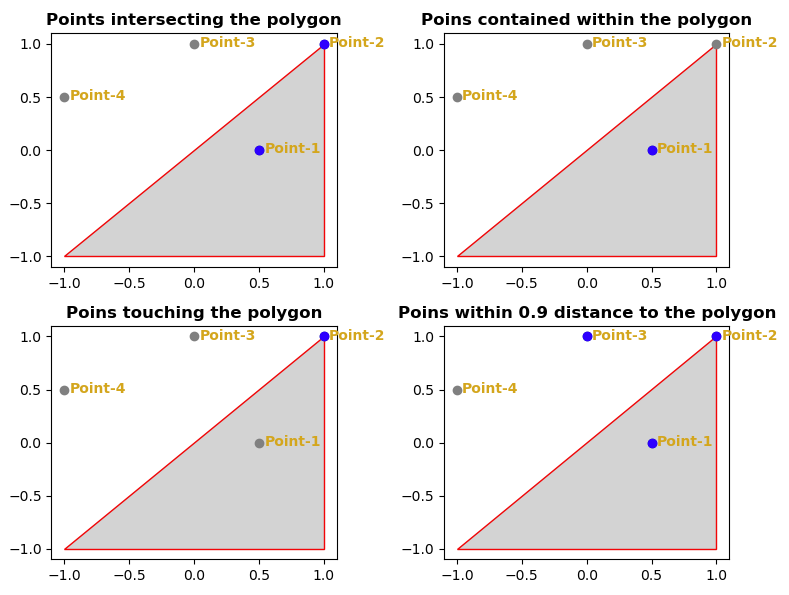

#### Spatial joins (within)

In [ ]:
nz = gpd.read_file("./data-module-2/nz.shp")
nz_height = gpd.read_file("./data-module-2/nz_height.shp")
canterbury = nz[nz["Name"] == "Canterbury"]
canterbury_height = gpd.sjoin(nz_height, canterbury, predicate="within")

Additional information on spatial joins with `geopandas` can be found in the documentation: 
- https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html
- https://geopandas.org/en/stable/docs/user_guide/mergingdata.html

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(9,9), tight_layout=True)

nz.plot(ax=axs[0], edgecolor="dimgrey", facecolor="whitesmoke")
nz_height.plot(ax=axs[0],color="red")
axs[0].set_title("High Points in New Zealand", weight="bold")
axs[0].set_facecolor("powderblue")

nz.plot(ax=axs[1], edgecolor="dimgrey", facecolor="whitesmoke")
canterbury.plot(ax=axs[1], edgecolor="dimgrey", facecolor="lightgrey")
canterbury_height.plot(ax=axs[1], color="red")
axs[1].set_title("High Points in Canterbury", weight="bold")
axs[1].set_facecolor("powderblue")

#### Spatial joins (within OR contains)

In [ ]:
points_gpd = gpd.read_file("./data-module-2/points.shp")
points_gpd

In [ ]:
points_within_world = gpd.sjoin(points_gpd, world, predicate="within")
points_within_world.head()

In [ ]:
world_with_points = gpd.sjoin(world, points_gpd, predicate="contains")
world_with_points.head()

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(9,9), tight_layout=True)

world.plot(ax=axs[0], edgecolor="slategrey", facecolor="none")
points_within_world.plot(ax=axs[0], marker="*", markersize=130, column="name_long", legend=True, cmap="Paired")
axs[0].set_title("Random points within countries", weight="bold")

world.plot(ax=axs[1], edgecolor="slategrey", facecolor="none")
world_with_points.plot(ax=axs[1], column="name_long", legend=True, cmap="Paired")
axs[1].set_title("Countries containing random points", weight="bold")

#### Combining operations (spatial join + dissolve)

In [ ]:
nz_merged = gpd.sjoin(nz, nz_height, predicate="contains")
nz_merged = nz_merged[["Name", "geometry", "elevation"]].dissolve(by="Name", aggfunc="mean")
nz_merged.head()

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(9,9), tight_layout=True)

nz.plot(ax=axs[0], edgecolor="dimgrey", facecolor="whitesmoke")
nz_height.plot(ax=axs[0], marker = "o", markersize=100, alpha=0.6, column="elevation", legend=True, scheme="FisherJenks", cmap="magma_r")
axs[0].set_title("Elevation of High Points in New Zealand", weight="bold")
axs[0].set_facecolor("powderblue")

nz.plot(ax=axs[1], edgecolor="dimgrey", facecolor="whitesmoke")
nz_merged.plot(ax=axs[1], column="elevation", edgecolor="dimgrey", legend=True,  scheme="FisherJenks", cmap="magma_r")
axs[1].set_title("Average elevation of High Points in New Zealand", weight="bold")
axs[1].set_facecolor("powderblue")

### **Geometry operations**

#### Centroids

**Check if your data is in Projected CRS. To use `centroid` function correctly, the data needs to be projected!
If needed, CRS can be changed with the following command:**
- `nz.to_crs("EPSG:2193")`

In [ ]:
nz.crs

In [ ]:
nz_centroid = nz.copy()
nz_centroid["geometry"] = nz.centroid
nz_centroid.head()

In [ ]:
seine = gpd.read_file("./data-module-2/seine.shp")
seine_centroid = seine.copy()
seine_centroid["geometry"] = seine.centroid
seine_centroid

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,5), tight_layout=True)

nz.plot(ax=axs[0], column="Name", cmap="Pastel1")
nz_centroid.plot(ax=axs[0], edgecolor="dimgrey", column="Name", cmap="Pastel1")
axs[0].set_title("New Zealand Regions with Centroids", weight="bold")
axs[0].set_facecolor("powderblue")

seine.plot(ax=axs[1], column="name", cmap="Accent")
seine_centroid.plot(ax=axs[1], edgecolor="dimgrey", column="name", cmap="Accent", markersize=120)
axs[1].set_title("Seine Tributaries with Centroids", weight="bold")
axs[1].set_facecolor("ivory")

#### Buffer

In [ ]:
nz_buffer = nz.copy()
nz_buffer["geometry"] = nz.buffer(50000)
seine_buffer = seine.copy()
seine_buffer["geometry"] = seine.buffer(5000)

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,5), tight_layout=True)

nz_buffer.plot(ax=axs[0], edgecolor="white", column="Name", cmap="Pastel1", alpha=0.7)
nz.plot(ax=axs[0], facecolor="none", edgecolor="dimgrey")
axs[0].set_title("New Zealand Regions with 50km buffer", weight="bold")
axs[0].set_facecolor("powderblue")

seine_buffer.plot(ax=axs[1], edgecolor="dimgrey", column="name", cmap="Accent")
seine.plot(ax=axs[1], color="white")
axs[1].set_title("Seine Tributaries with 5km Buffer", weight="bold")
axs[1].set_facecolor("ivory")

#### Clip geometry

In [ ]:
uganda =  world[(world["name_long"] == "Uganda")]
lakes_gdf = gpd.read_file("./data-module-2/lakes.shp")

**Check if your input datasets are in the same CRS. To clip the geometries, CRS needs to be consistent across the datasets!**

In [ ]:
lake_segments.crs == uganda.crs

In [ ]:
lake_segments = gpd.overlay(lakes_gdf, uganda)

In [ ]:
lakes_inter = gpd.sjoin(lakes_gdf, uganda, predicate="intersects")
lakes_within = gpd.sjoin(lakes_gdf, uganda, predicate="within")

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

lakes_gdf.plot(ax=axs[0,0], facecolor="skyblue", edgecolor="none")
uganda.plot(ax=axs[0,0], facecolor="none", edgecolor="black")
axs[0,0].set_title("Lakes", weight="bold")

lakes_gdf.plot(ax=axs[0,1], facecolor="skyblue", edgecolor="none")
lakes_inter.plot(ax=axs[0,1], facecolor="red", edgecolor="none")
uganda.plot(ax=axs[0,1], facecolor="none", edgecolor="black")
axs[0,1].set_title("Lakes intersect", weight="bold")

lakes_gdf.plot(ax=axs[1,0], facecolor="skyblue", edgecolor="none")
lakes_within.plot(ax=axs[1,0], facecolor="red", edgecolor="none")
uganda.plot(ax=axs[1,0], facecolor="none", edgecolor="black")
axs[1,0].set_title("Lakes within", weight="bold")

lakes_gdf.plot(ax=axs[1,1], facecolor="skyblue", edgecolor="none")
lake_segments.plot(ax=axs[1,1], facecolor="red", edgecolor="none")
uganda.plot(ax=axs[1,1], facecolor="none", edgecolor="black")
axs[1,1].set_title("Lakes overlayed", weight="bold")

### **Exercices**

#### Data
- `gw_provinces_extra.shp` - Minnesota Groundwater Provinces shapefile;
- `mn_rivers.shp` - Minnesota river shapefile;
- `soil_samp.shp` - Soil temperature stations shapefile.

**Question 1. Find and plot all groundwater provinces in Minnesota that have `var1` equal to `"a"` and `var3` greater than 100.**

**Question 2. Create a simple `DataFrame` with the following code:**
```r
random.seed(0) 
data = {"ProvID": list(range(1,7)),
        "var4":["yes", "no", "no", "yes", "no", "yes"],
        "var5": random.sample(range(10, 50), 6)}
gw_prov_df = pd.DataFrame(data)
```
**Merge `gw_provinces_extra_gdf` with `gw_prov_df` into a new object called `gw_prov_stats`. Which columns were used as keys for join? Pay attention to the data type of these columns.**

**Question 3. Dissolve groundwater provinces data by `var1`. Use `sum` as aggregation function.**

**Question 4. Find and plot the rivers found (even partially) in groundwater PROVINCE 5.**

**Question 5. Which groundwater province is the Lamberton soil sample site located in?**

**Question 6. Find the soil sample sites that are within 10 km of the Mississippi river.**

**Question 7. Find 10-km buffer for Mississippi river, the centroid for Mississippi river, and Mississippi river segments clipped by PROVINCE 4 (use `overlay` operation). Display results on a figure with 3 subplots.**